In [4]:
import pandas as pd
import numpy as np

In [9]:
df_1 = pd.read_csv('yifeisun_si618_project1_AverageBudget_no_0.tsv', sep='\t')
df_1.reset_index(inplace=True)
df_1.columns = ["year","genre","budget"]
df_1

,year,genre,budget
0,1902,Adventure,5985.0
1,1902,Fantasy,5985.0
2,1902,Science Fiction,5985.0
3,1903,Action,150.0
4,1903,Adventure,150.0
...,...,...,...
1444,2018,Action,18000000.0
1445,2018,Comedy,15000000.0
1446,2018,Drama,12000000.0
1447,2018,Fantasy,18000000.0


In [30]:
df_cpi = pd.read_csv('US CPI.csv')
df_cpi["Year"]=df_cpi["Yearmon"].apply(lambda x: x[-4:])
df_cpi = df_cpi.drop_duplicates(subset=['Year'])
df_cpi.columns = ["Yearmon","CPI","year"]
df_cpi['year'] = df_cpi['year'].astype(int)
df_cpi

,Yearmon,CPI,year
0,01-01-1913,9.800,1913
12,01-01-1914,10.000,1914
24,01-01-1915,10.100,1915
36,01-01-1916,10.400,1916
48,01-01-1917,11.700,1917
...,...,...,...
1248,01-01-2017,242.839,2017
1260,01-01-2018,247.867,2018
1272,01-01-2019,251.712,2019
1284,01-01-2020,257.971,2020


In [33]:
df_1_adj = df_1.merge(df_cpi,on ="year")
df_1_adj["adj budget"]=df_1_adj["budget"]/df_1_adj["CPI"]
df_1_adj

,year,genre,budget,Yearmon,CPI,adj budget
0,1914,Drama,210.00,01-01-1914,10.000,21.000000
1,1914,History,210.00,01-01-1914,10.000,21.000000
2,1915,Animation,5000.00,01-01-1915,10.100,495.049505
3,1915,Comedy,5000.00,01-01-1915,10.100,495.049505
4,1915,Drama,46913.67,01-01-1915,10.100,4644.917822
...,...,...,...,...,...,...
1433,2018,Action,18000000.00,01-01-2018,247.867,72619.590345
1434,2018,Comedy,15000000.00,01-01-2018,247.867,60516.325287
1435,2018,Drama,12000000.00,01-01-2018,247.867,48413.060230
1436,2018,Fantasy,18000000.00,01-01-2018,247.867,72619.590345


In [34]:
genre_list_adj = list(df_1_adj.groupby("genre").mean().sort_values("adj budget",ascending=False).index)
genre_list_adj_1 = genre_list_adj[:5]
genre_list_adj_2 = genre_list_adj[5:10]
genre_list_adj_3 = genre_list_adj[10:15]
genre_list_adj_4 = genre_list_adj[15:]

In [35]:
df_dict_adj = {}
for genre in set(df_1_adj["genre"]):
    df_dict_adj[genre] = df_1_adj[df_1_adj["genre"]==genre]  

In [15]:
genre_list = list(df_1.groupby("genre").mean().sort_values("budget",ascending=False).index)
genre_list_1 = genre_list[:5]
genre_list_2 = genre_list[5:10]
genre_list_3 = genre_list[10:15]
genre_list_4 = genre_list[15:]

In [16]:
df_dict = {}
for genre in set(df_1["genre"]):
    df_dict[genre] = df_1[df_1["genre"]==genre]   

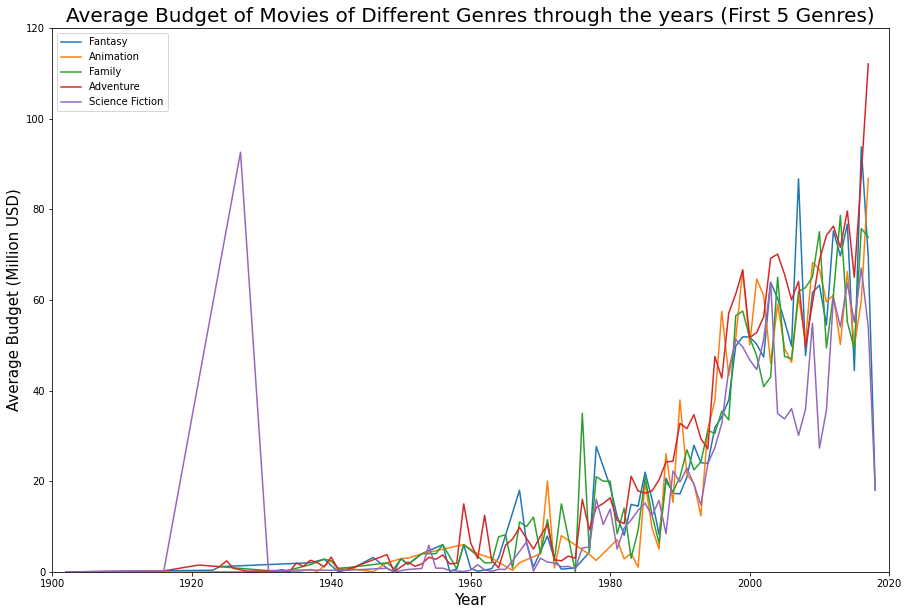

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_1:
    df = df_dict[genre]
    plt.plot(df["year"], df["budget"]/1e6, label = genre)
plt.title("Average Budget of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Budget (Million USD)", fontsize=15)
plt.ylim([0, 120])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

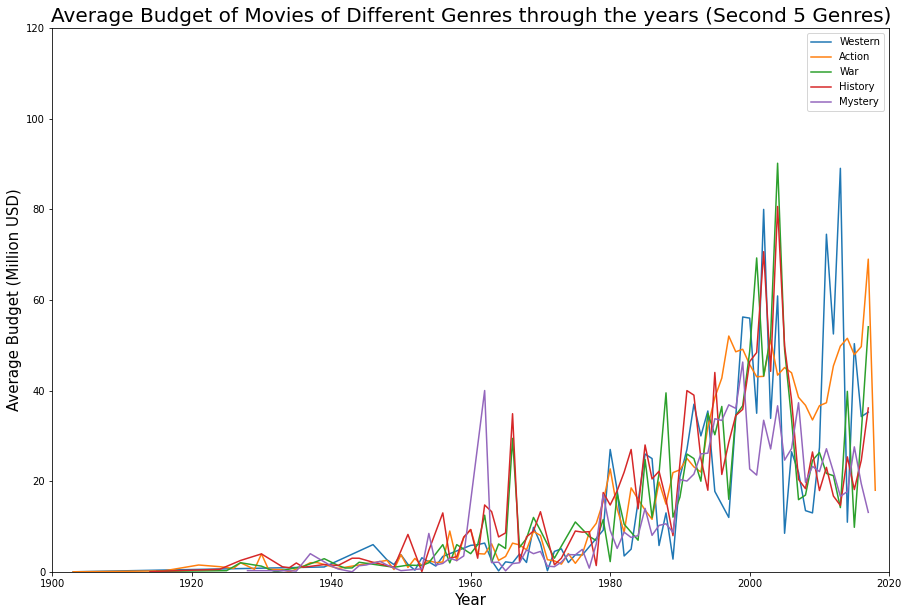

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_2:
    df = df_dict[genre]
    plt.plot(df["year"], df["budget"]/1e6, label = genre)
plt.title("Average Budget of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Budget (Million USD)", fontsize=15)
plt.ylim([0, 120])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

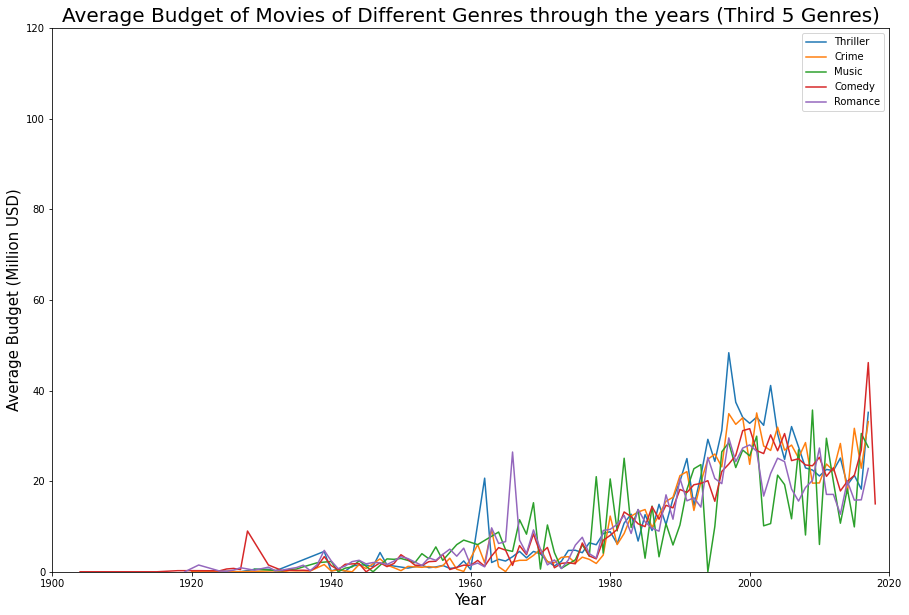

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_3:
    df = df_dict[genre]
    plt.plot(df["year"], df["budget"]/1e6, label = genre)
plt.title("Average Budget of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Budget (Million USD)", fontsize=15)
plt.ylim([0, 120])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

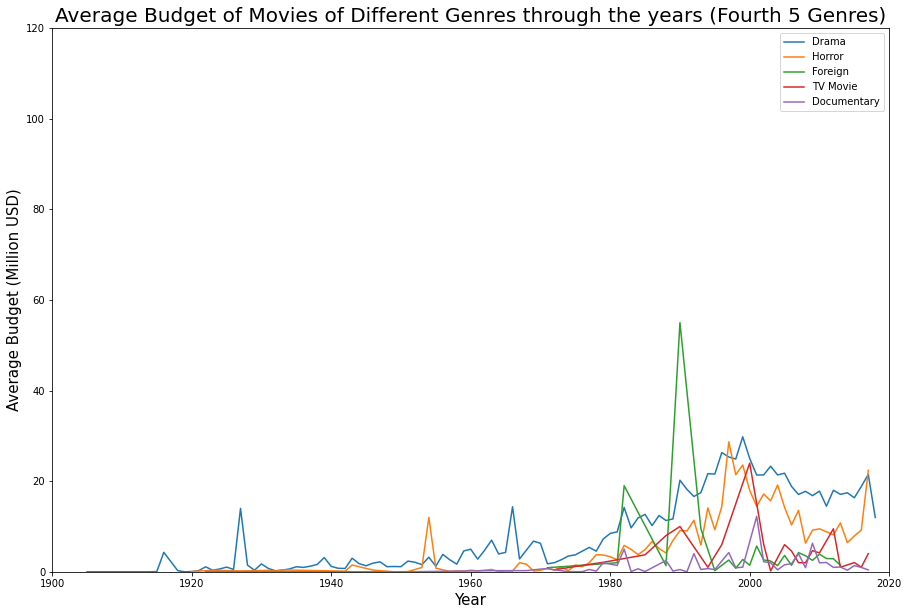

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_4:
    df = df_dict[genre]
    plt.plot(df["year"], df["budget"]/1e6, label = genre)
plt.title("Average Budget of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Budget (Million USD)", fontsize=15)
plt.ylim([0, 120])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

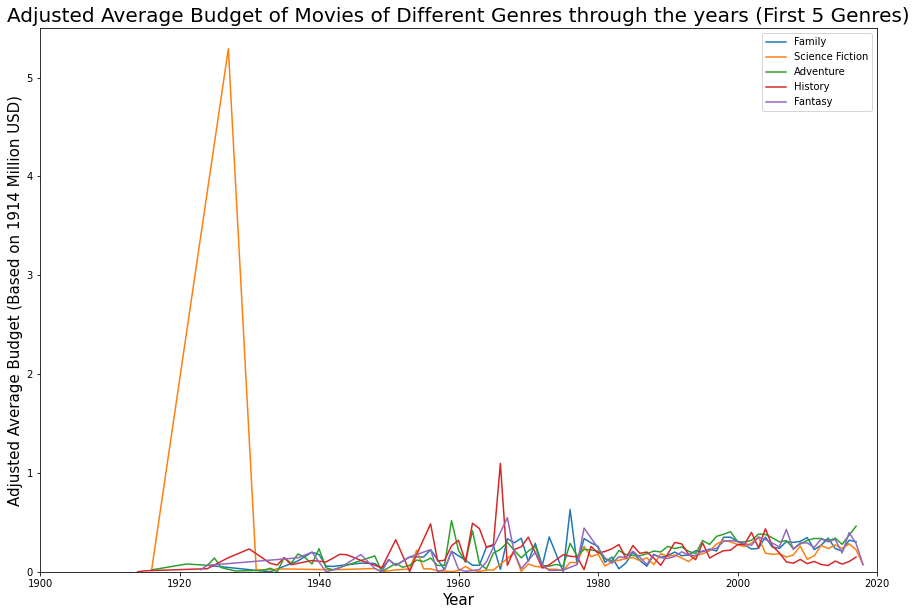

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_1:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj budget"]/1e6, label = genre)
plt.title("Adjusted Average Budget of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Budget (Based on 1914 Million USD)", fontsize=15)
plt.ylim([0, 5.5])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

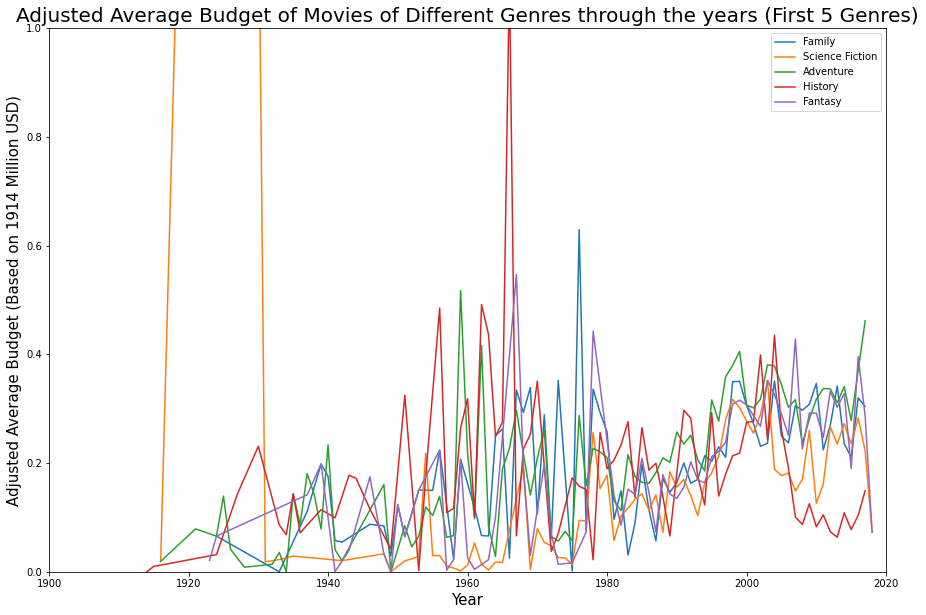

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_1:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj budget"]/1e6, label = genre)
plt.title("Adjusted Average Budget of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Budget (Based on 1914 Million USD)", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

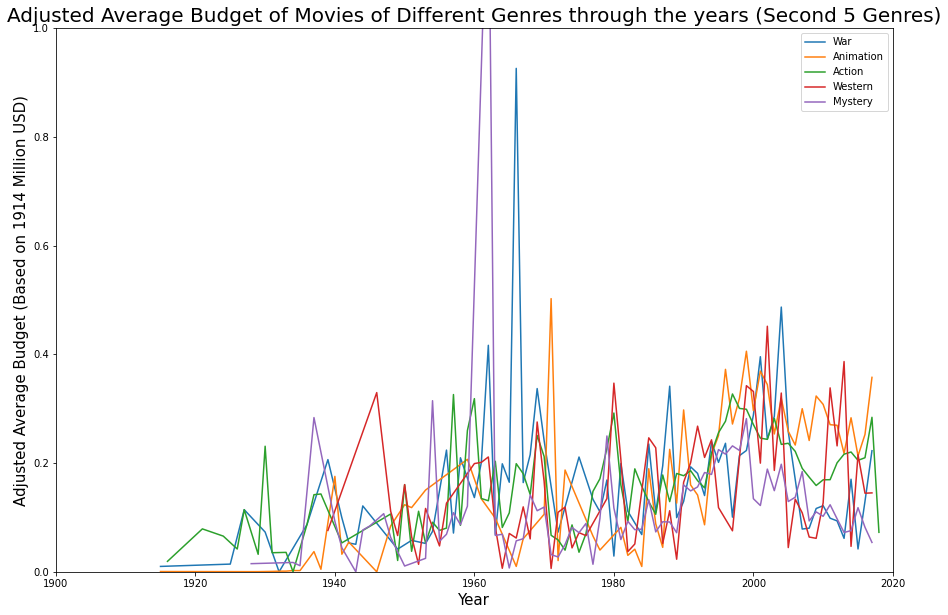

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_2:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj budget"]/1e6, label = genre)
plt.title("Adjusted Average Budget of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Budget (Based on 1914 Million USD)", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

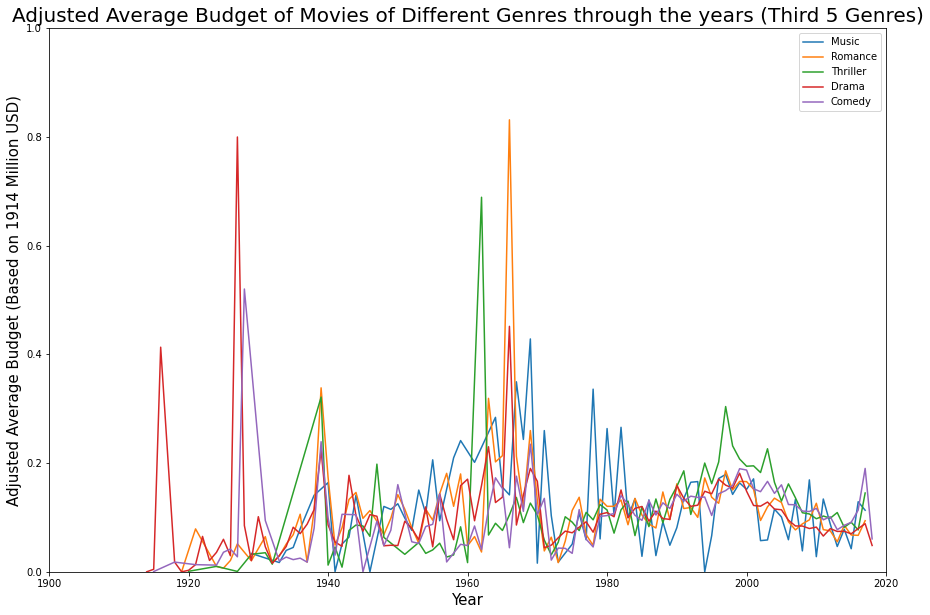

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_3:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj budget"]/1e6, label = genre)
plt.title("Adjusted Average Budget of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Budget (Based on 1914 Million USD)", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

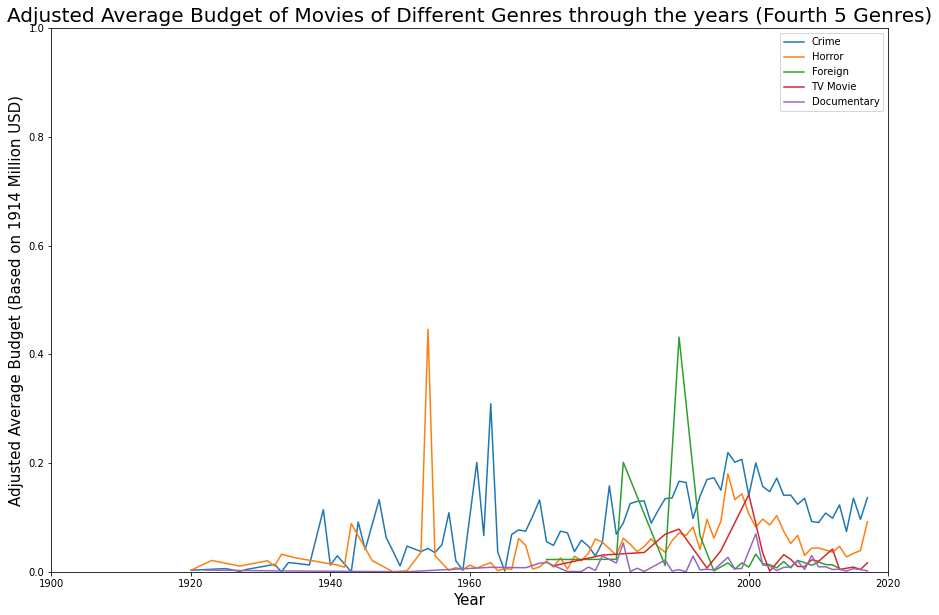

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_4:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj budget"]/1e6, label = genre)
plt.title("Adjusted Average Budget of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Budget (Based on 1914 Million USD)", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

In [54]:
df_1 = pd.read_csv('yifeisun_si618_project1_AverageRevenue_no_0.tsv', sep='\t')
df_1.reset_index(inplace=True)
df_1.columns = ["year","genre","revenue"]
df_1

,year,genre,revenue
0,1915,Drama,5.568682e+06
1,1915,History,1.100000e+07
2,1915,War,1.100000e+07
3,1916,Action,8.000000e+06
4,1916,Adventure,8.000000e+06
...,...,...,...
1275,2017,Romance,1.450963e+08
1276,2017,Science Fiction,2.081089e+08
1277,2017,Thriller,1.499682e+08
1278,2017,War,1.424450e+08


In [55]:
df_1_adj = df_1.merge(df_cpi,on ="year")
df_1_adj["adj revenue"]=df_1_adj["revenue"]/df_1_adj["CPI"]
df_1_adj

,year,genre,revenue,Yearmon,CPI,adj revenue
0,1915,Drama,5.568682e+06,01-01-1915,10.100,5.513547e+05
1,1915,History,1.100000e+07,01-01-1915,10.100,1.089109e+06
2,1915,War,1.100000e+07,01-01-1915,10.100,1.089109e+06
3,1916,Action,8.000000e+06,01-01-1916,10.400,7.692308e+05
4,1916,Adventure,8.000000e+06,01-01-1916,10.400,7.692308e+05
...,...,...,...,...,...,...
1275,2017,Romance,1.450963e+08,01-01-2017,242.839,5.975000e+05
1276,2017,Science Fiction,2.081089e+08,01-01-2017,242.839,8.569831e+05
1277,2017,Thriller,1.499682e+08,01-01-2017,242.839,6.175622e+05
1278,2017,War,1.424450e+08,01-01-2017,242.839,5.865819e+05


In [57]:
genre_list_adj = list(df_1_adj.groupby("genre").mean().sort_values("adj revenue",ascending=False).index)
genre_list_adj_1 = genre_list_adj[:5]
genre_list_adj_2 = genre_list_adj[5:10]
genre_list_adj_3 = genre_list_adj[10:15]
genre_list_adj_4 = genre_list_adj[15:]

In [58]:
df_dict_adj = {}
for genre in set(df_1_adj["genre"]):
    df_dict_adj[genre] = df_1_adj[df_1_adj["genre"]==genre]  

In [59]:
genre_list = list(df_1.groupby("genre").mean().sort_values("revenue",ascending=False).index)
genre_list_1 = genre_list[:5]
genre_list_2 = genre_list[5:10]
genre_list_3 = genre_list[10:15]
genre_list_4 = genre_list[15:]

In [60]:
df_dict = {}
for genre in set(df_1["genre"]):
    df_dict[genre] = df_1[df_1["genre"]==genre]   

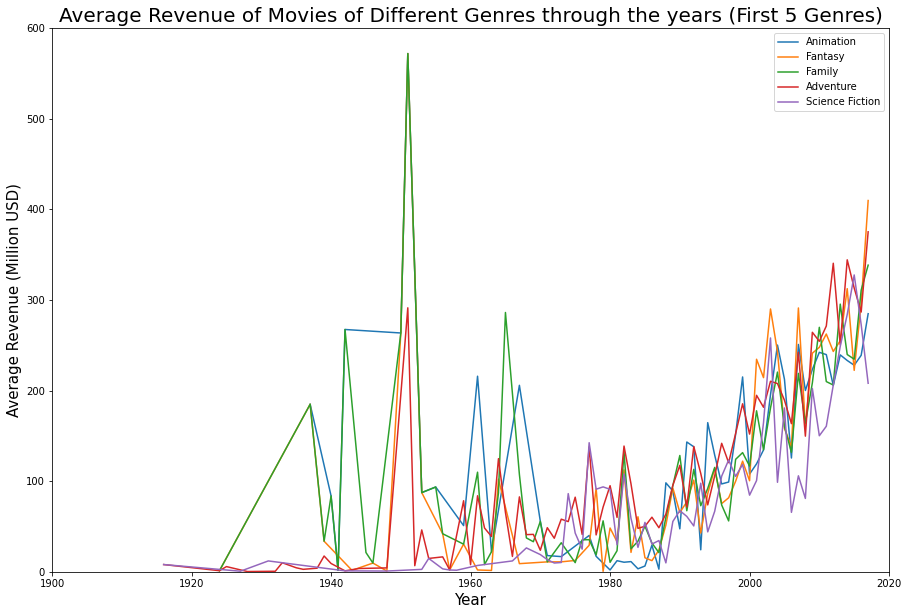

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_1:
    df = df_dict[genre]
    plt.plot(df["year"], df["revenue"]/1e6, label = genre)
plt.title("Average Revenue of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Revenue (Million USD)", fontsize=15)
plt.ylim([0, 600])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

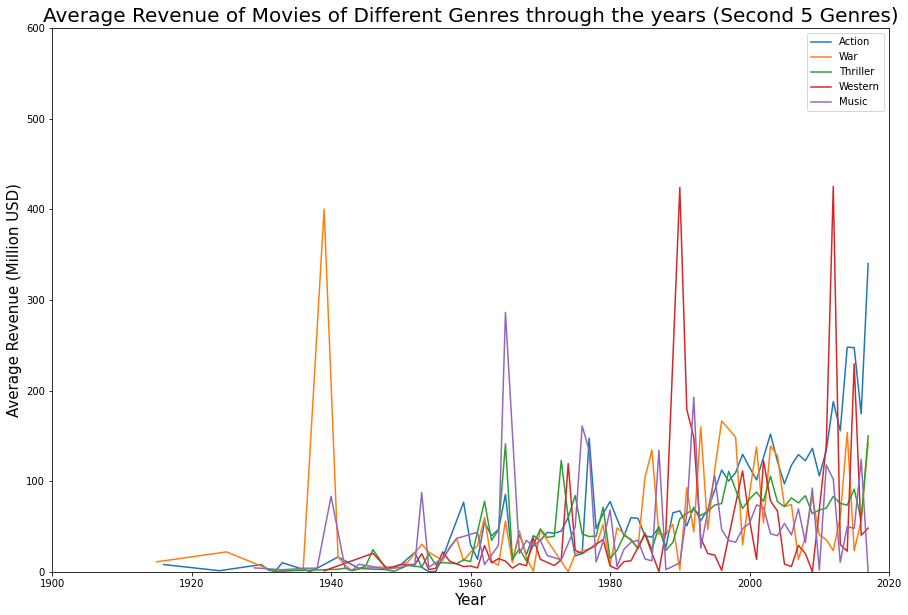

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_2:
    df = df_dict[genre]
    plt.plot(df["year"], df["revenue"]/1e6, label = genre)
plt.title("Average Revenue of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Revenue (Million USD)", fontsize=15)
plt.ylim([0, 600])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

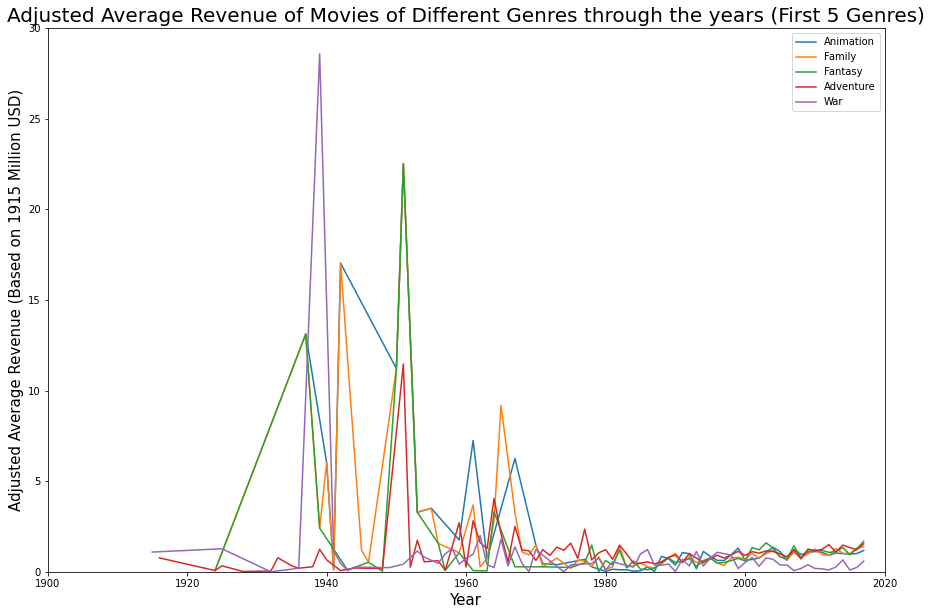

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_1:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj revenue"]/1e6, label = genre)
plt.title("Adjusted Average Revenue of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 30])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

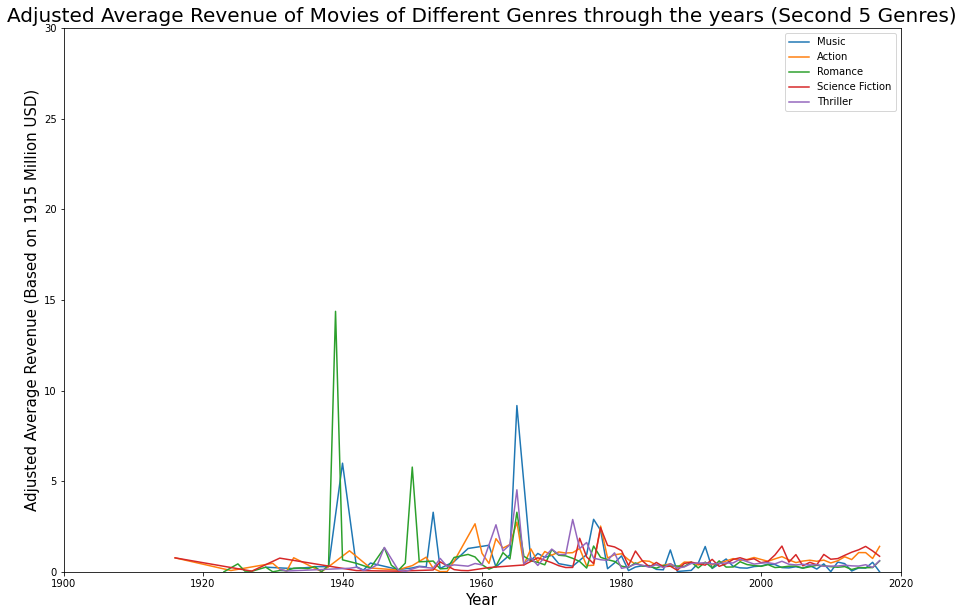

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_2:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj revenue"]/1e6, label = genre)
plt.title("Adjusted Average Revenue of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Revenue (Based on 1915 Million USD)", fontsize=15)
plt.ylim([0, 30])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

In [86]:
df_1 = pd.read_csv('yifeisun_si618_project1_AverageProfit_no_0.tsv', sep='\t')
df_1.reset_index(inplace=True)
df_1.columns = ["year","genre","profit"]
df_1

,year,genre,profit
0,1915,Drama,5.510027e+06
1,1915,History,1.090000e+07
2,1915,War,1.090000e+07
3,1916,Action,7.800000e+06
4,1916,Adventure,7.800000e+06
...,...,...,...
1208,2017,Romance,1.672077e+08
1209,2017,Science Fiction,1.360238e+08
1210,2017,Thriller,1.271951e+08
1211,2017,War,1.283352e+08


In [87]:
df_1_adj = df_1.merge(df_cpi,on ="year")
df_1_adj["adj profit"]=df_1_adj["profit"]/df_1_adj["CPI"]
df_1_adj

,year,genre,profit,Yearmon,CPI,adj profit
0,1915,Drama,5.510027e+06,01-01-1915,10.100,5.455472e+05
1,1915,History,1.090000e+07,01-01-1915,10.100,1.079208e+06
2,1915,War,1.090000e+07,01-01-1915,10.100,1.079208e+06
3,1916,Action,7.800000e+06,01-01-1916,10.400,7.500000e+05
4,1916,Adventure,7.800000e+06,01-01-1916,10.400,7.500000e+05
...,...,...,...,...,...,...
1208,2017,Romance,1.672077e+08,01-01-2017,242.839,6.885537e+05
1209,2017,Science Fiction,1.360238e+08,01-01-2017,242.839,5.601397e+05
1210,2017,Thriller,1.271951e+08,01-01-2017,242.839,5.237837e+05
1211,2017,War,1.283352e+08,01-01-2017,242.839,5.284786e+05


In [88]:
genre_list_adj = list(df_1_adj.groupby("genre").mean().sort_values("adj profit",ascending=False).index)
genre_list_adj_1 = genre_list_adj[:5]
genre_list_adj_2 = genre_list_adj[5:10]
genre_list_adj_3 = genre_list_adj[10:15]
genre_list_adj_4 = genre_list_adj[15:]
df_dict_adj = {}
for genre in set(df_1_adj["genre"]):
    df_dict_adj[genre] = df_1_adj[df_1_adj["genre"]==genre]  
genre_list = list(df_1.groupby("genre").mean().sort_values("profit",ascending=False).index)
genre_list_1 = genre_list[:5]
genre_list_2 = genre_list[5:10]
genre_list_3 = genre_list[10:15]
genre_list_4 = genre_list[15:]
df_dict = {}
for genre in set(df_1["genre"]):
    df_dict[genre] = df_1[df_1["genre"]==genre]   

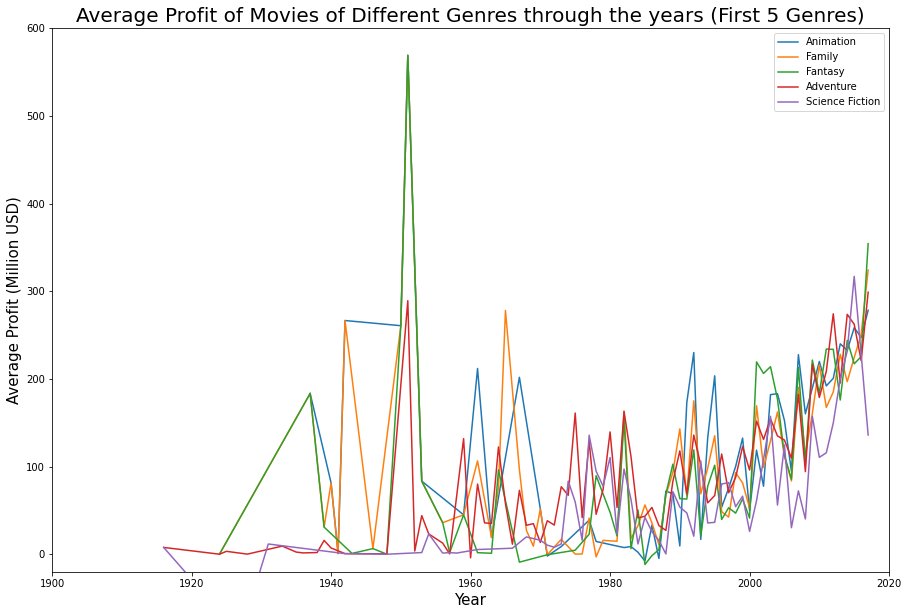

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_1:
    df = df_dict[genre]
    plt.plot(df["year"], df["profit"]/1e6, label = genre)
plt.title("Average Profit of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Profit (Million USD)", fontsize=15)
plt.ylim([-20, 600])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

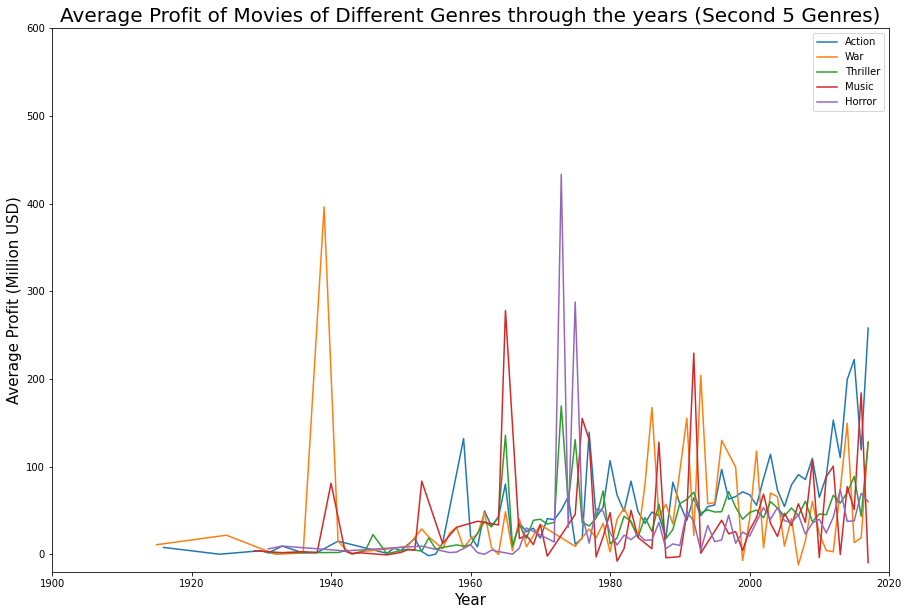

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_2:
    df = df_dict[genre]
    plt.plot(df["year"], df["profit"]/1e6, label = genre)
plt.title("Average Profit of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Profit (Million USD)", fontsize=15)
plt.ylim([-20, 600])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

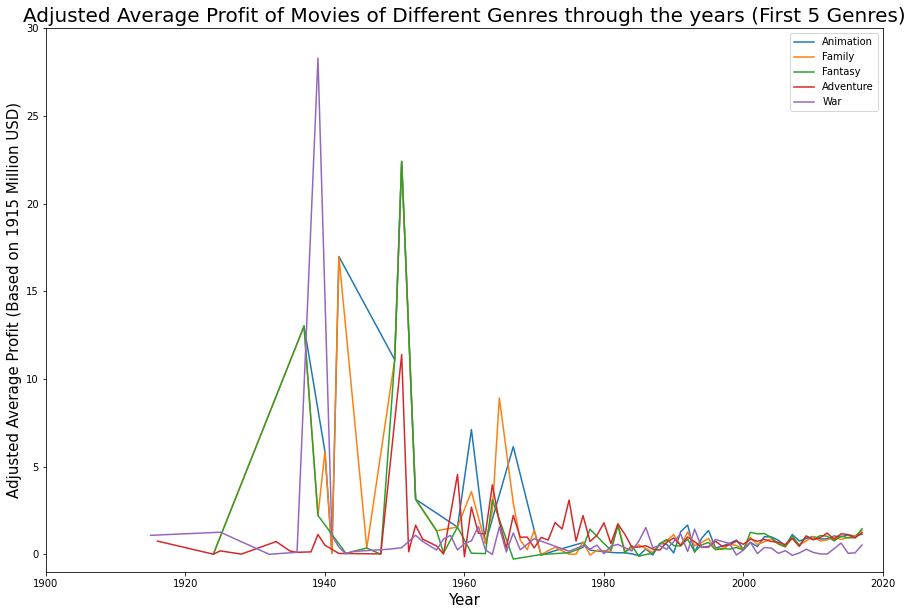

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_1:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj profit"]/1e6, label = genre)
plt.title("Adjusted Average Profit of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Profit (Based on 1915 Million USD)", fontsize=15)
plt.ylim([-1, 30])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

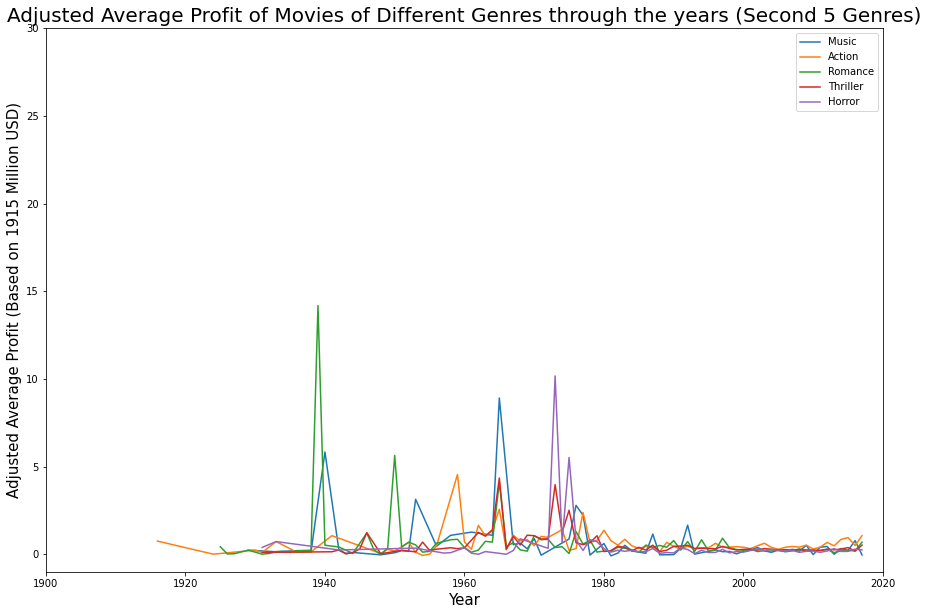

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_adj_2:
    df = df_dict_adj[genre]
    plt.plot(df["year"], df["adj profit"]/1e6, label = genre)
plt.title("Adjusted Average Profit of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Adjusted Average Profit (Based on 1915 Million USD)", fontsize=15)
plt.ylim([-1, 30])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

In [99]:
import numpy as np
df_1 = pd.read_csv('yifeisun_si618_project1_AverageReturnRate_no_0.tsv', sep='\t')
df_1.reset_index(inplace=True)
df_1.columns = ["year","genre","return"]
df_1["log return"] = np.log(df_1["return"])
df_1

,year,genre,return,log return
0,1915,Drama,94.94,4.553245
1,1915,History,110.00,4.700480
2,1915,War,110.00,4.700480
3,1916,Action,40.00,3.688879
4,1916,Adventure,40.00,3.688879
...,...,...,...,...
1208,2017,Romance,4.85,1.578979
1209,2017,Science Fiction,2.34,0.850151
1210,2017,Thriller,3.32,1.199965
1211,2017,War,3.12,1.137833


In [100]:
genre_list = list(df_1.groupby("genre").mean().sort_values("log return",ascending=False).index)
genre_list_1 = genre_list[:5]
genre_list_2 = genre_list[5:10]
genre_list_3 = genre_list[10:15]
genre_list_4 = genre_list[15:]
df_dict = {}
for genre in set(df_1["genre"]):
    df_dict[genre] = df_1[df_1["genre"]==genre]   

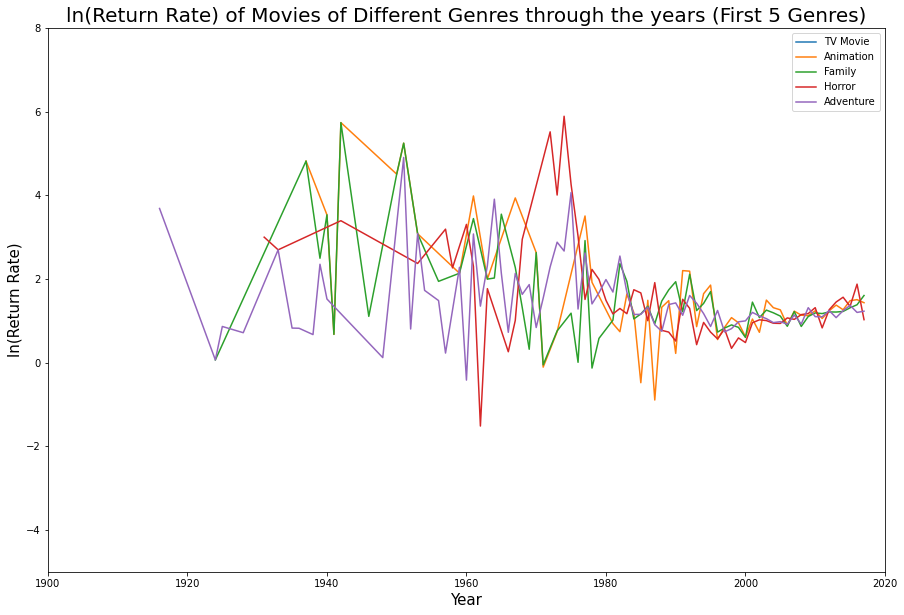

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_1:
    df = df_dict[genre]
    plt.plot(df["year"], df["log return"], label = genre)
plt.title("ln(Return Rate) of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("ln(Return Rate)", fontsize=15)
plt.ylim([-5, 8])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

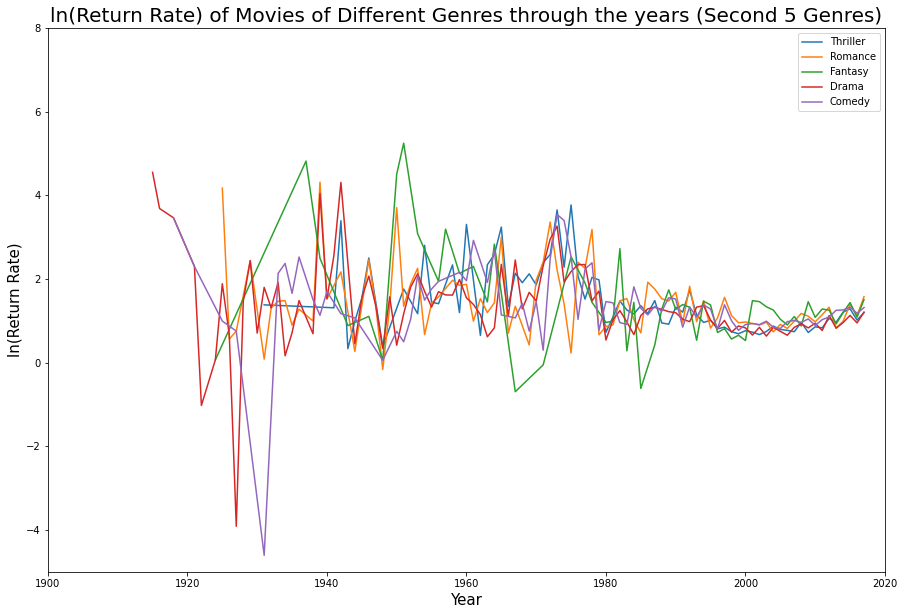

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_2:
    df = df_dict[genre]
    plt.plot(df["year"], df["log return"], label = genre)
plt.title("ln(Return Rate) of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("ln(Return Rate)", fontsize=15)
plt.ylim([-5, 8])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

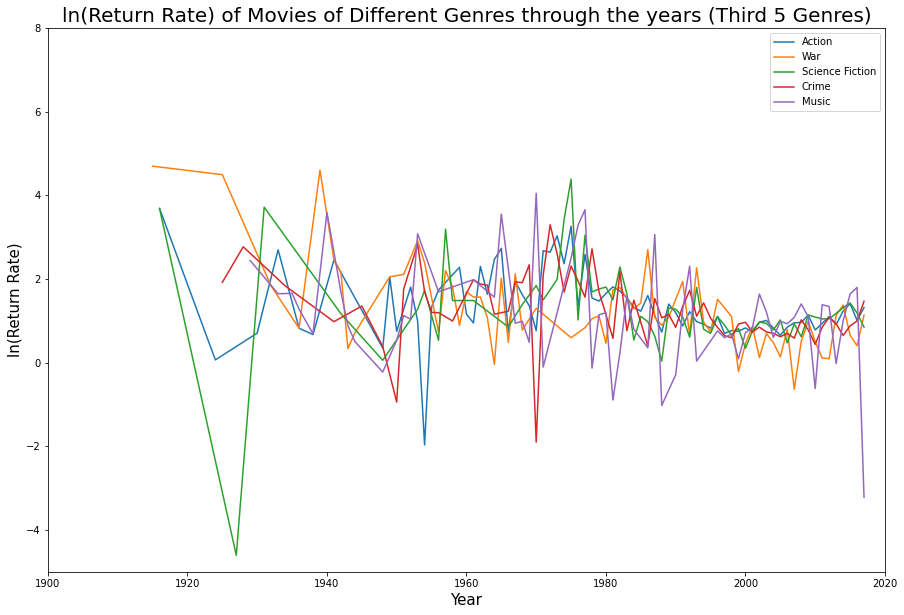

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_3:
    df = df_dict[genre]
    plt.plot(df["year"], df["log return"], label = genre)
plt.title("ln(Return Rate) of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("ln(Return Rate)", fontsize=15)
plt.ylim([-5, 8])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

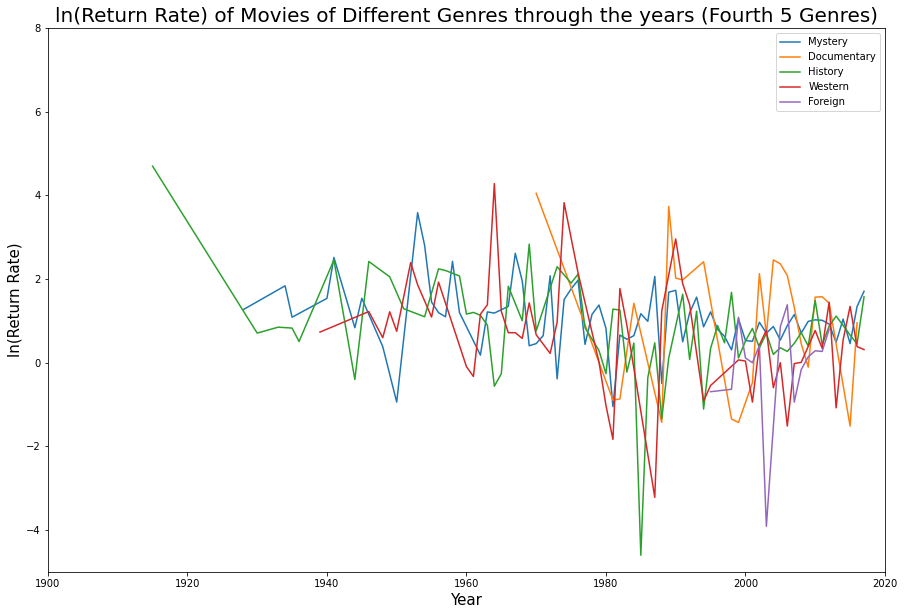

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_4:
    df = df_dict[genre]
    plt.plot(df["year"], df["log return"], label = genre)
plt.title("ln(Return Rate) of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("ln(Return Rate)", fontsize=15)
plt.ylim([-5, 8])
plt.xlim([1900, 2020])
plt.legend()
plt.show()

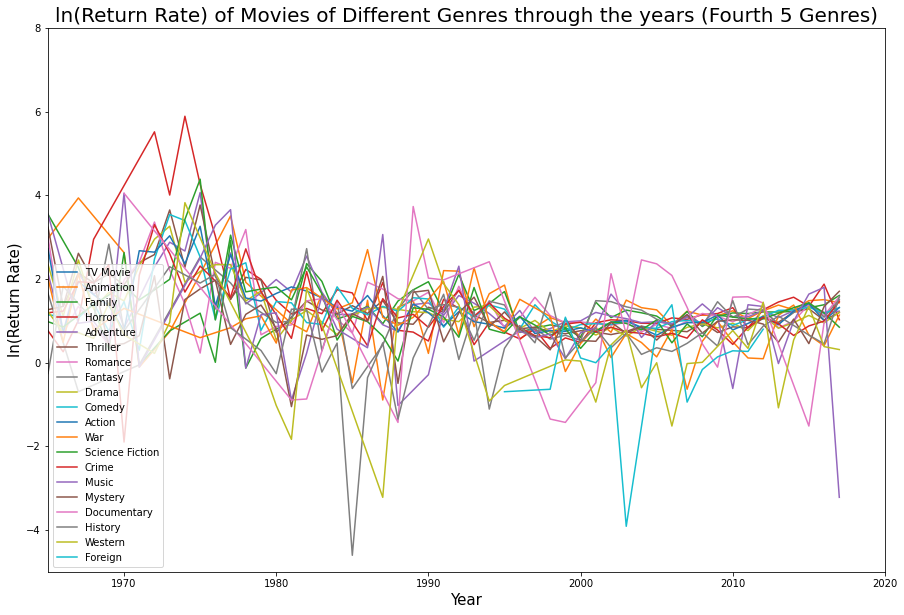

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list:
    df = df_dict[genre]
    plt.plot(df["year"], df["log return"], label = genre)
plt.title("ln(Return Rate) of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("ln(Return Rate)", fontsize=15)
plt.ylim([-5, 8])
plt.xlim([1965, 2020])
plt.legend()
plt.show()

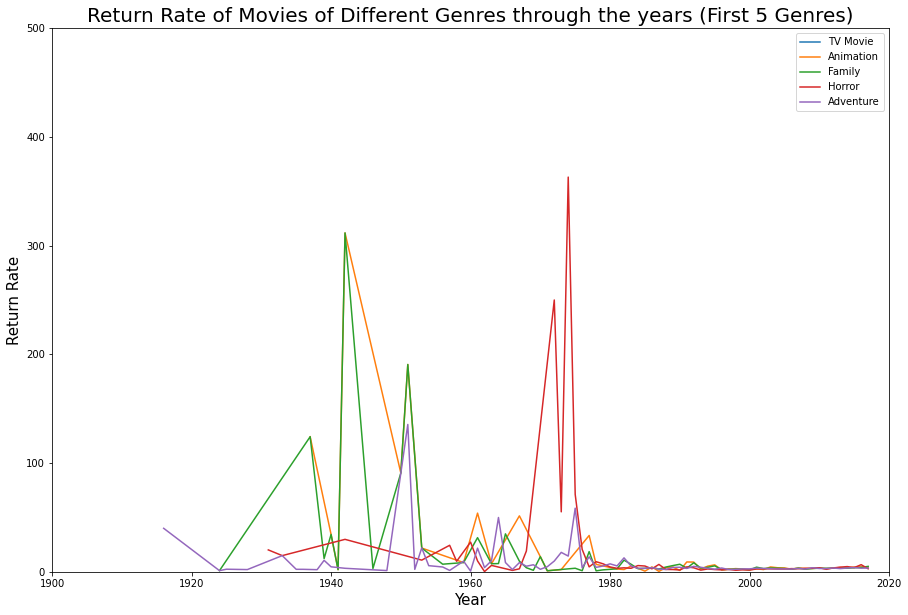

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in genre_list_1:
    df = df_dict[genre]
    plt.plot(df["year"], df["return"], label = genre)
plt.title("Return Rate of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Return Rate", fontsize=15)
plt.ylim([0, 500])
plt.xlim([1900, 2020])
plt.legend()
plt.show()